# **MBTPy**
---
data_exploration



### Import & Data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data_set = pd.read_csv('../data/raw/mbti_1.csv')


In [3]:
# Get a general overview of the data
print(data_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [4]:
print(data_set.describe())

        type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


In [19]:
# Print the first 5 rows of the dataset
print(data_set.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


### Overall distribution of personality types

In [20]:
# Get the number of observations for each personality type
print(data_set['type'].value_counts())

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


In [21]:
# Get the percentage of observations for each personality type
print(data_set['type'].value_counts(normalize=True))

INFP    0.211182
INFJ    0.169452
INTP    0.150317
INTJ    0.125764
ENTP    0.078963
ENFP    0.077810
ISTP    0.038847
ISFP    0.031239
ENTJ    0.026628
ISTJ    0.023631
ENFJ    0.021902
ISFJ    0.019135
ESTP    0.010259
ESFP    0.005533
ESFJ    0.004841
ESTJ    0.004496
Name: type, dtype: float64


In [22]:
# Get the number of words for each post
data_set['posts_length'] = data_set['posts'].apply(lambda x: len(x.split()))
print(data_set['posts_length'].describe())

count    8675.000000
mean     1226.241499
std       311.210544
min         4.000000
25%      1046.500000
50%      1278.000000
75%      1457.000000
max      1881.000000
Name: posts_length, dtype: float64


In [23]:
# Get the number of posts for each personality type
cnt_srs = data_set['type'].value_counts()

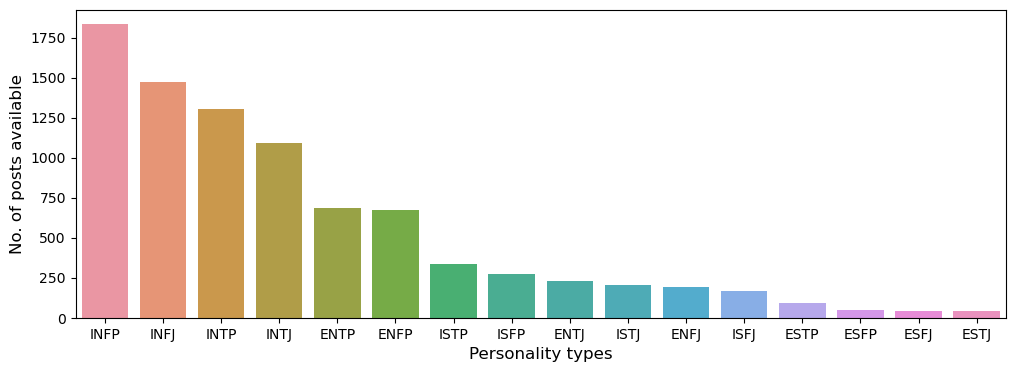

In [24]:
# Plot the number of posts for each personality type
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts available', fontsize=12)
plt.show()


In [25]:
# sns.countplot(x='type', data=data_set)
# plt.xlabel('Personality types', fontsize=12)
# plt.ylabel('No. of posts available', fontsize=12)
# plt.show()


### Word frequency analysis

In [26]:
from wordcloud import WordCloud, STOPWORDS
import nltk
# nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
# Get the number of posts for each personality type
cnt_srs = data_set['type'].value_counts()

# Create a word frequency dictionary for each personality type
stop_words = set(stopwords.words('english'))
words = {}
for t in cnt_srs.index:
    words[t] = []
    for text in data_set[data_set['type'] == t]['posts']:
        words_in_text = word_tokenize(text)
        words[t].extend([w.lower() for w in words_in_text if w.isalpha() and w.lower() not in stop_words])


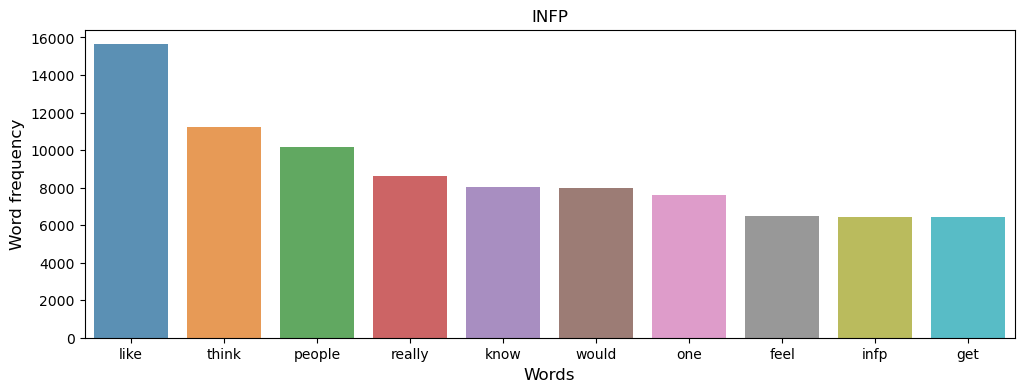

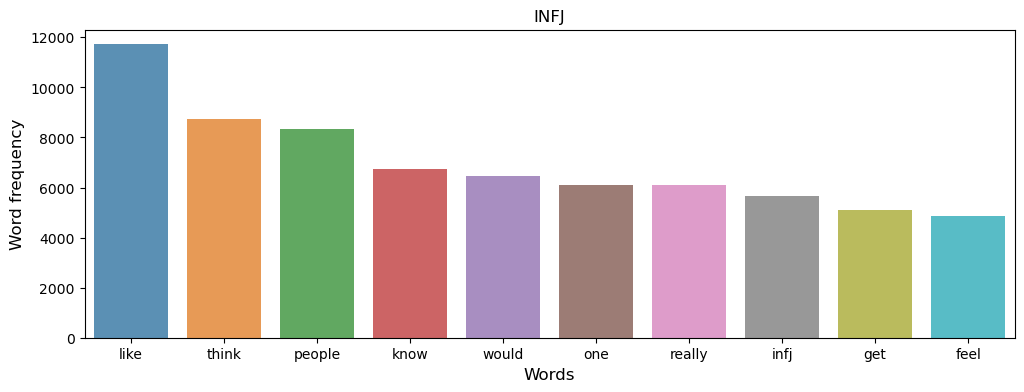

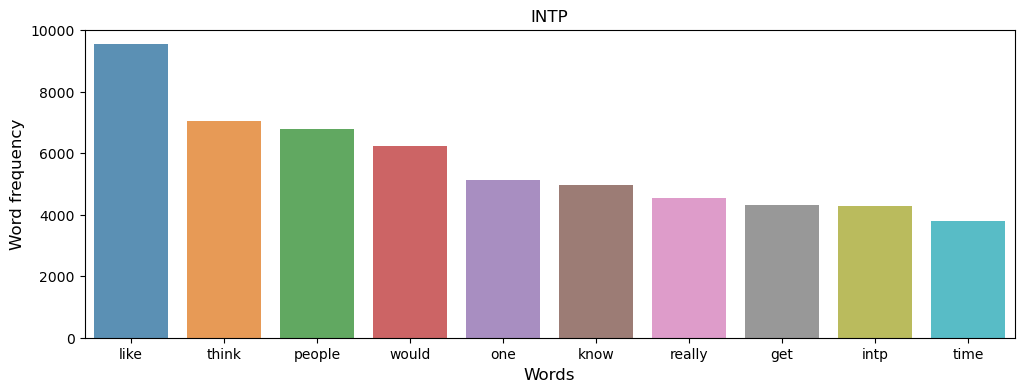

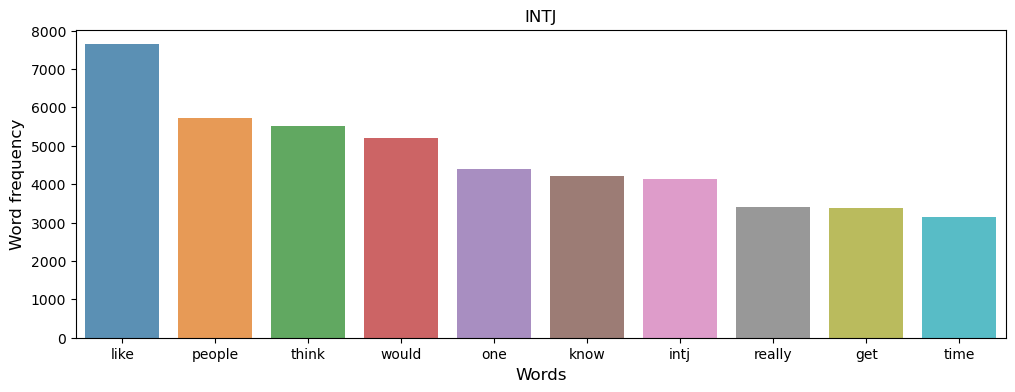

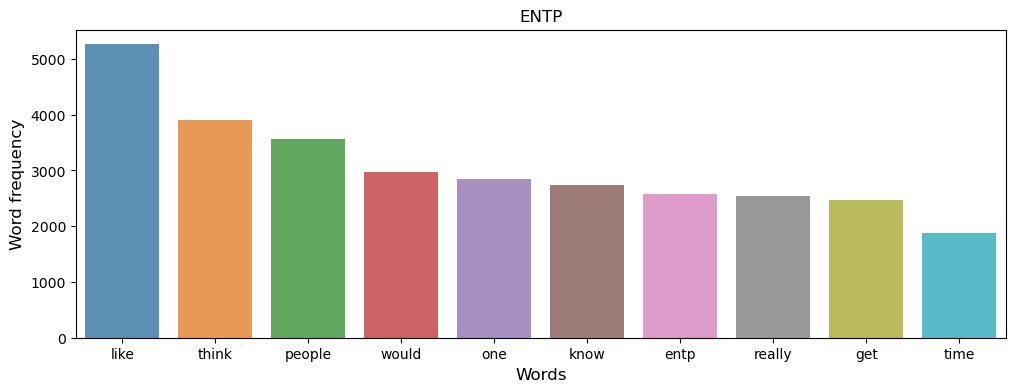

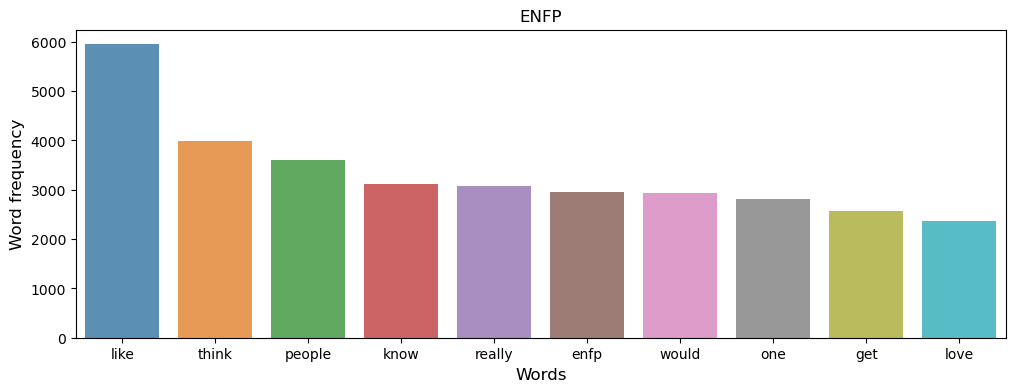

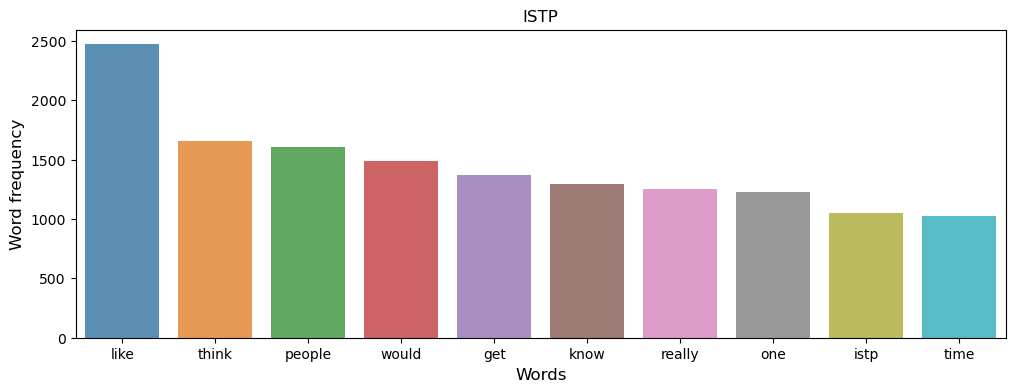

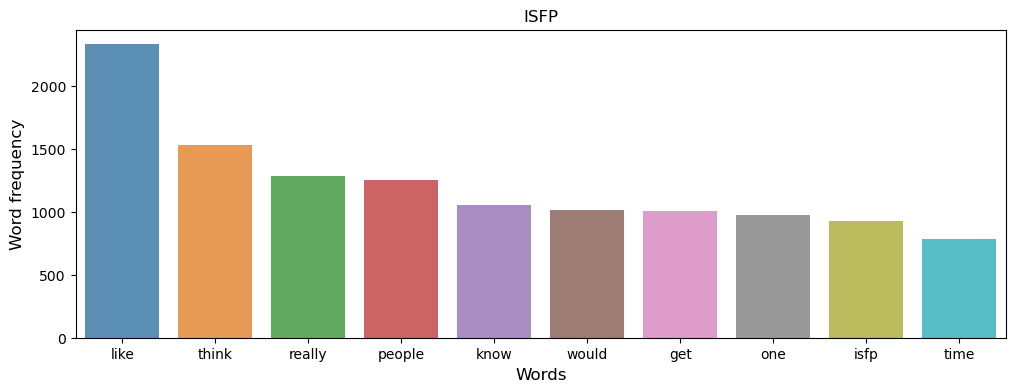

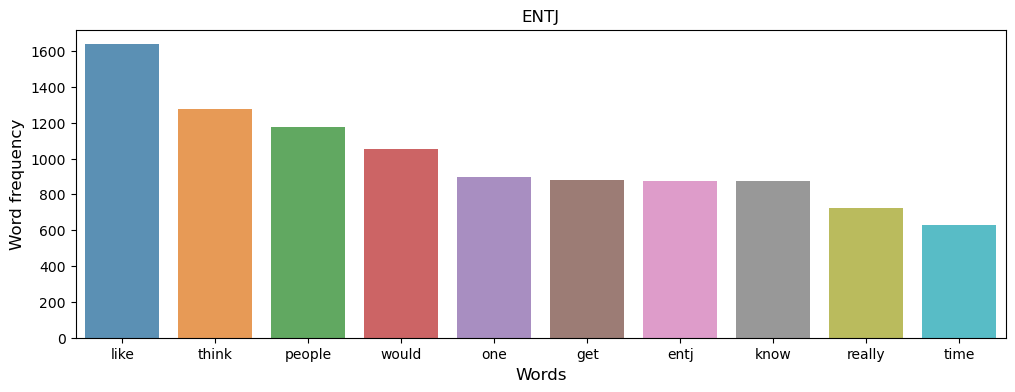

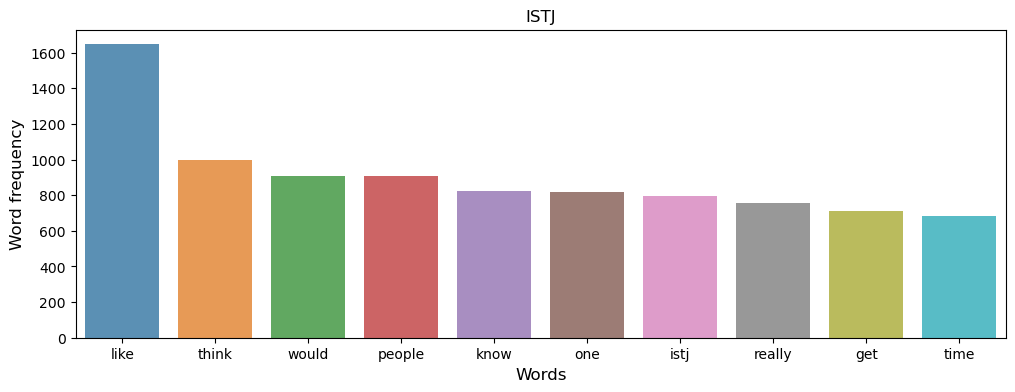

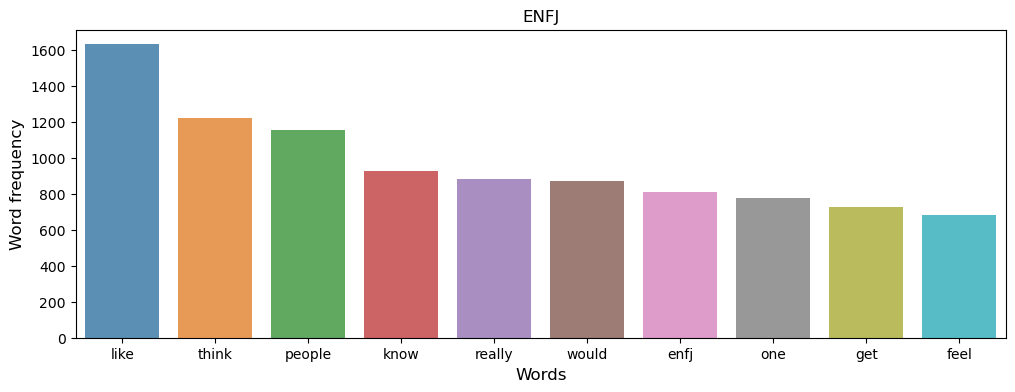

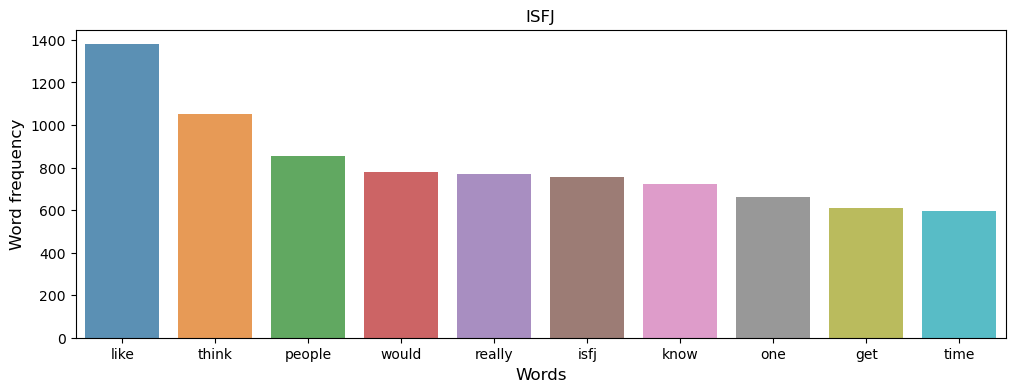

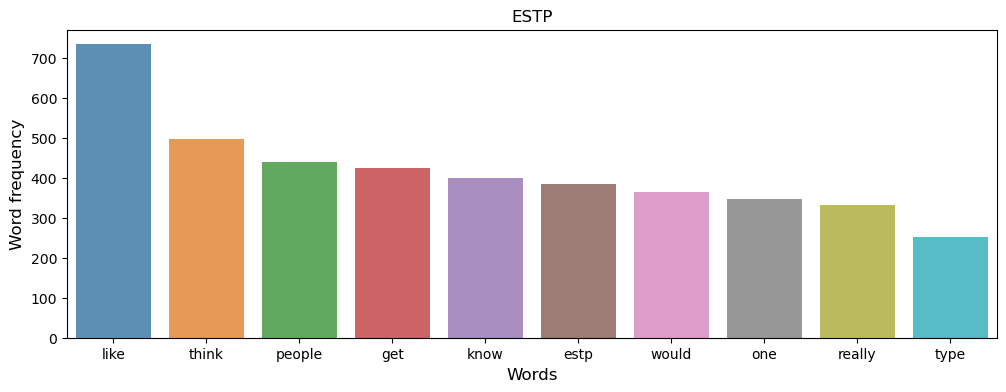

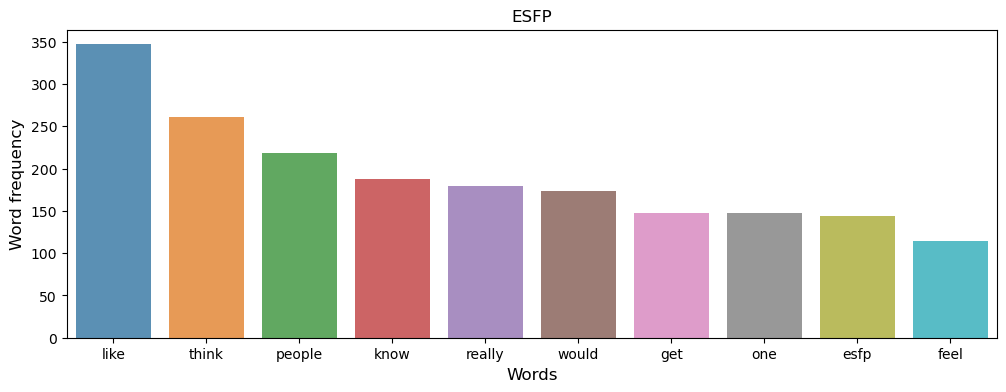

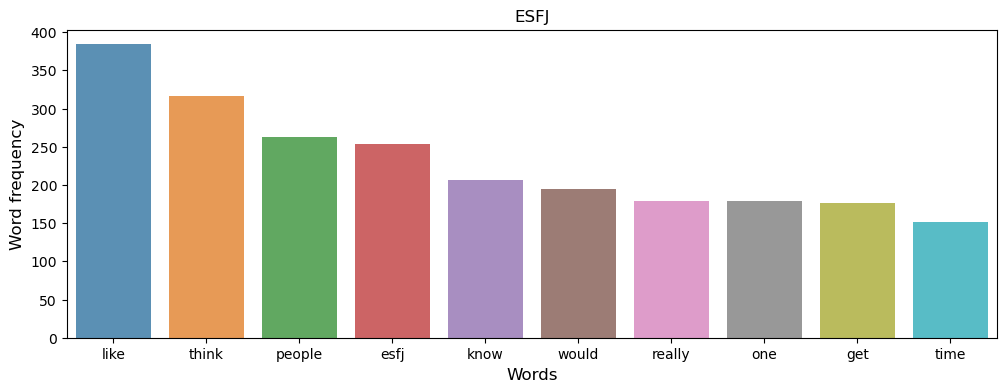

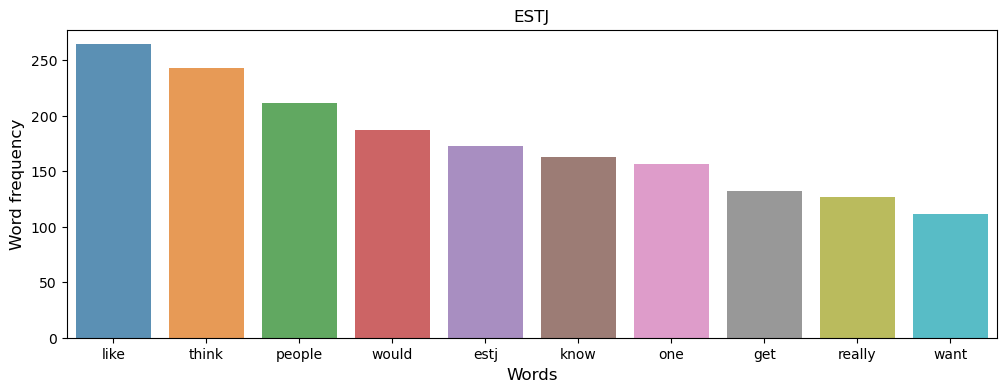

In [29]:
# Plot the word frequency for each personality type
for t in cnt_srs.index:
    plt.figure(figsize=(12,4))
    word_freq = pd.Series(words[t]).value_counts()
    sns.barplot(x=word_freq.index[:10], y=word_freq.values[:10], alpha=0.8)
    plt.title(t)
    plt.ylabel('Word frequency', fontsize=12)
    plt.xlabel('Words', fontsize=12)
    plt.show()

Alternative

In [30]:
# Create a word frequency dataframe
df = pd.DataFrame(columns=['type','words'])
df['type'] = data_set['type']
df['words'] = data_set['posts'].apply(lambda x: ' '.join(x.split("|||")))

In [31]:
# Create a word frequency for each personality type
df_word_freq = df.groupby('type').sum()

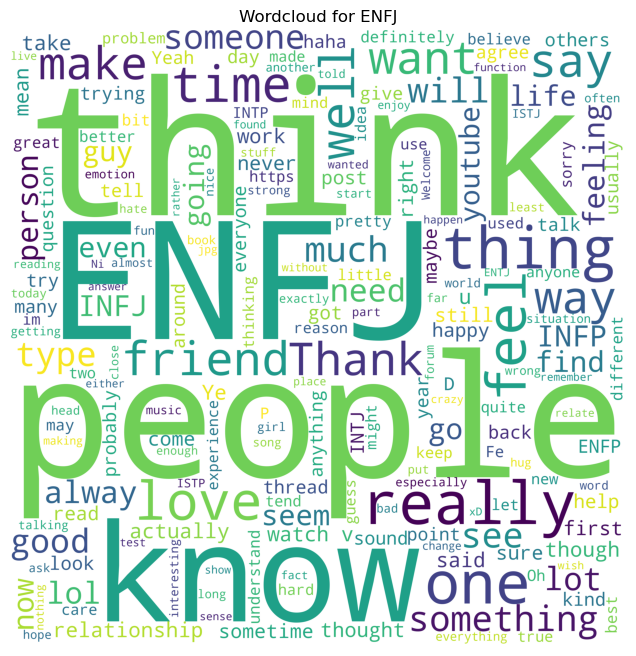

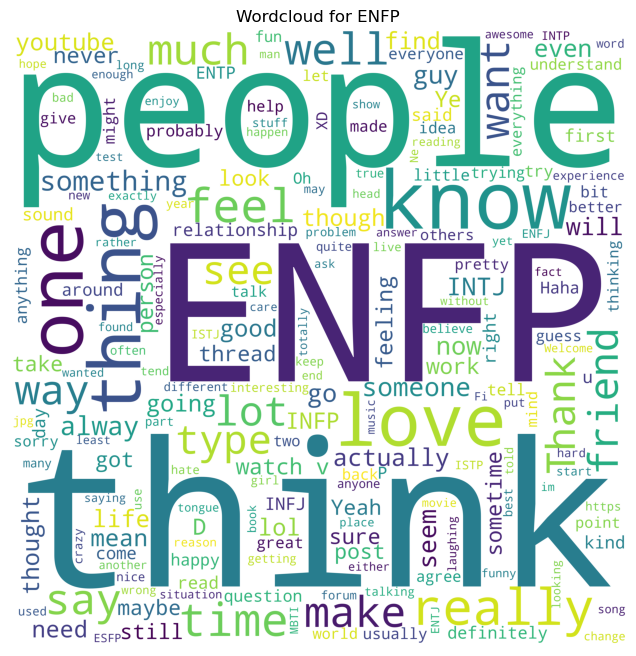

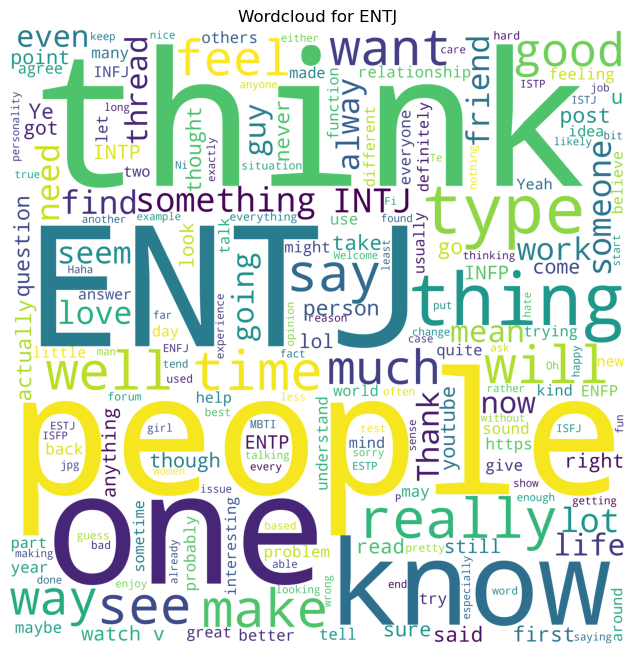

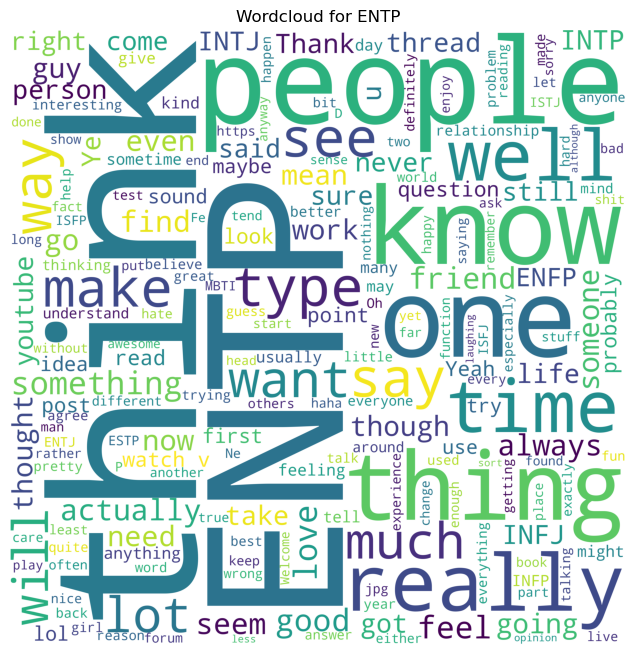

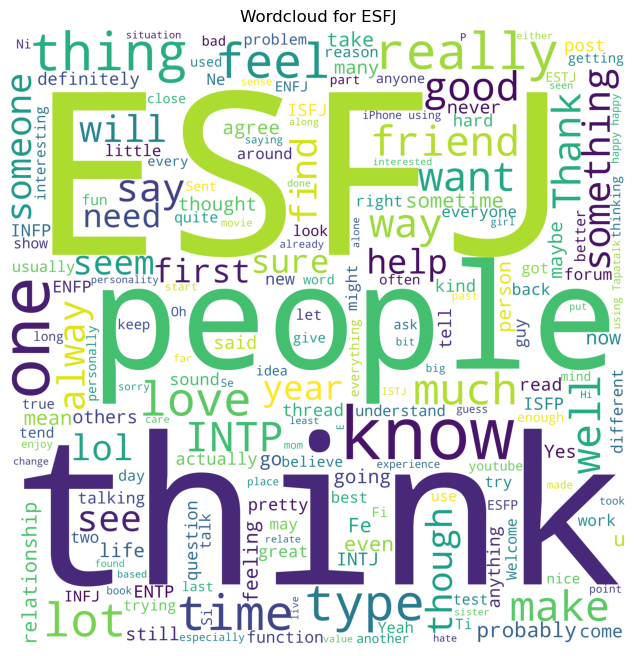

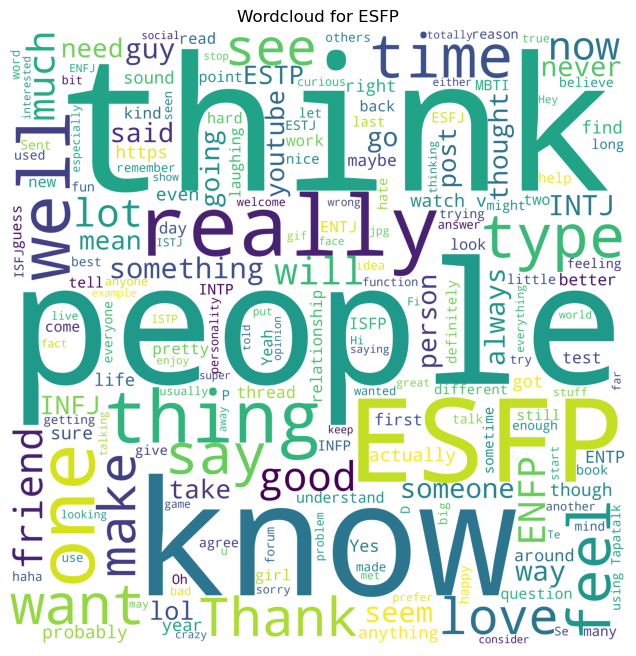

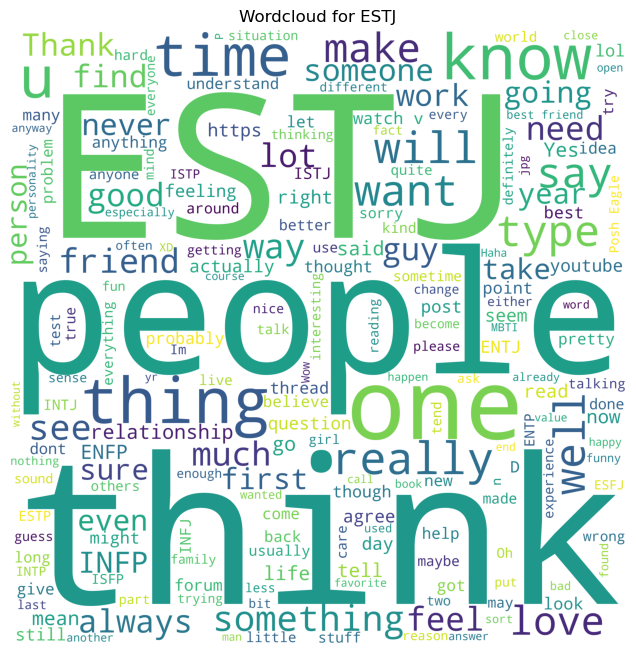

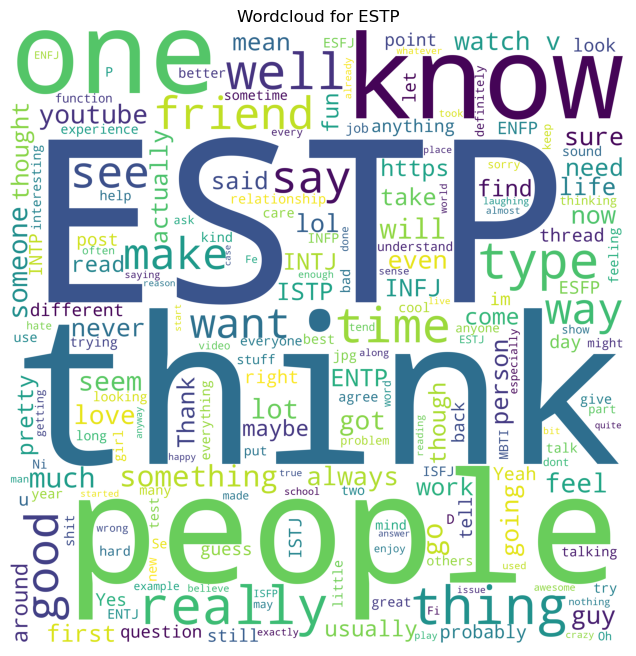

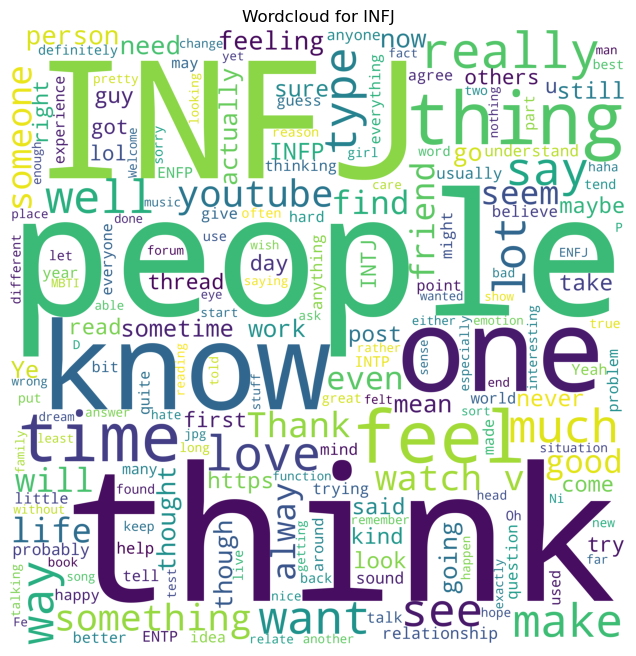

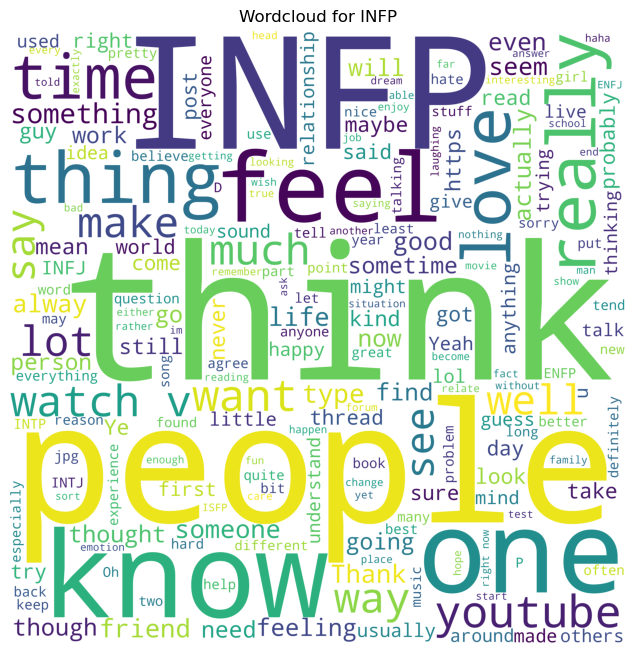

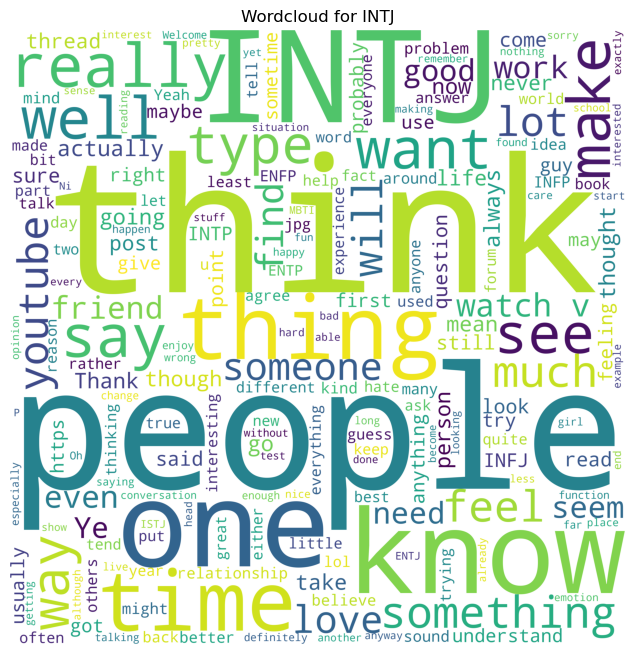

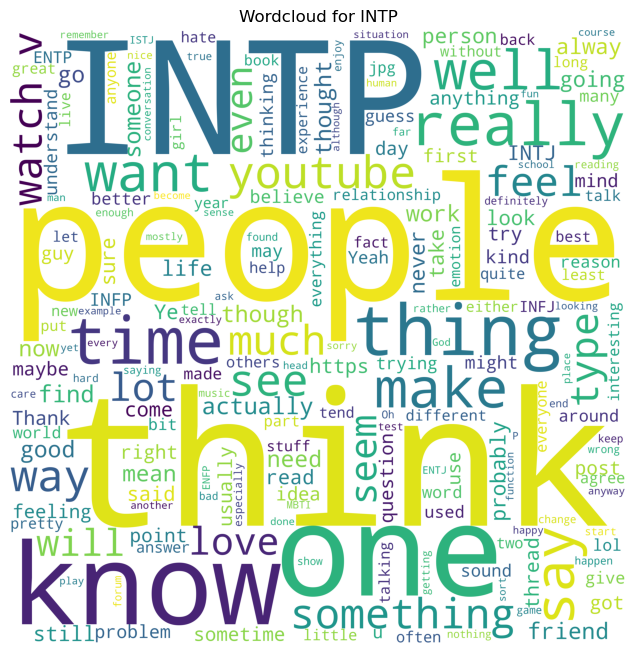

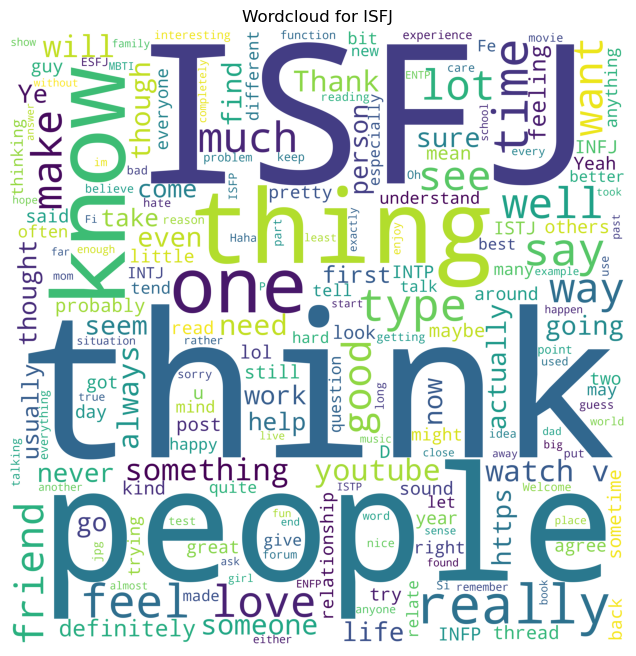

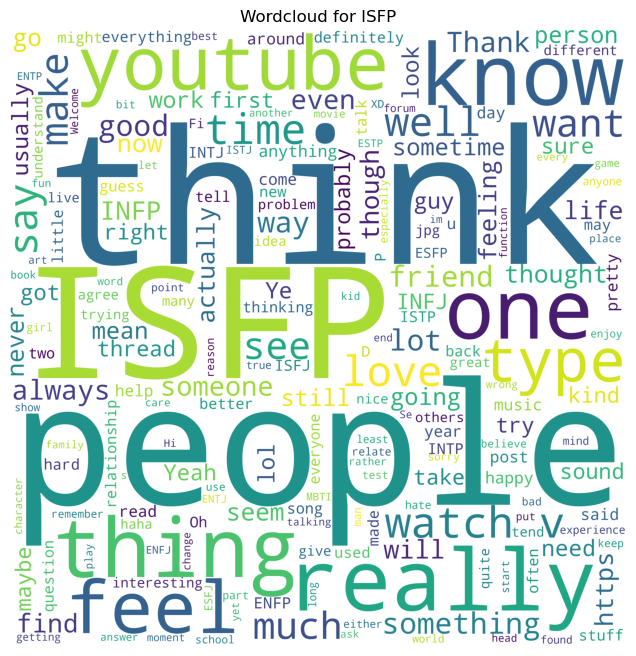

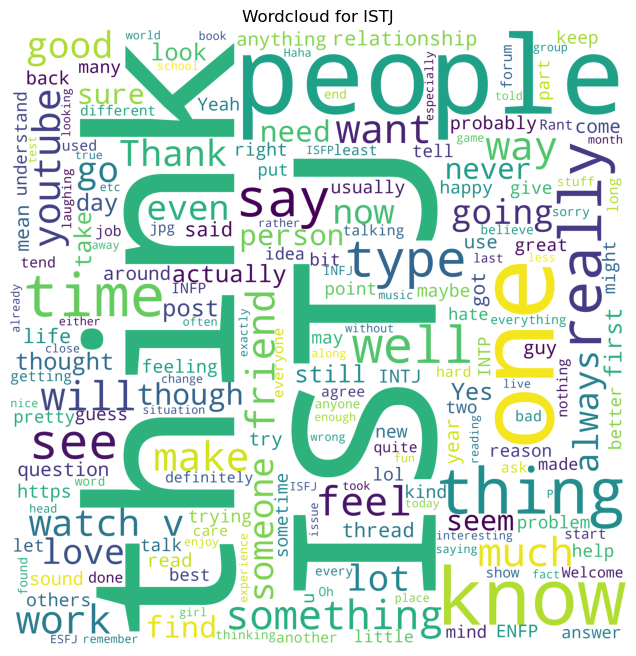

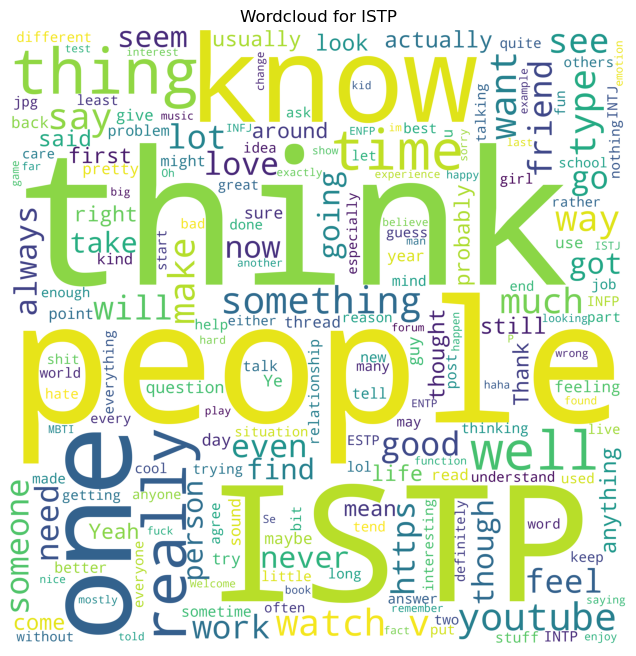

In [32]:
# Create a wordcloud for each personality type
stopwords = set(STOPWORDS)
for index, row in df_word_freq.iterrows():
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=3000, height=3000).generate(row['words'])
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.title(f'Wordcloud for {index}')
    plt.axis("off")
    plt.show()

### Sentiment analysis

In [34]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data_set['sentiment_score'] = data_set['posts'].apply(lambda x: get_sentiment(x))


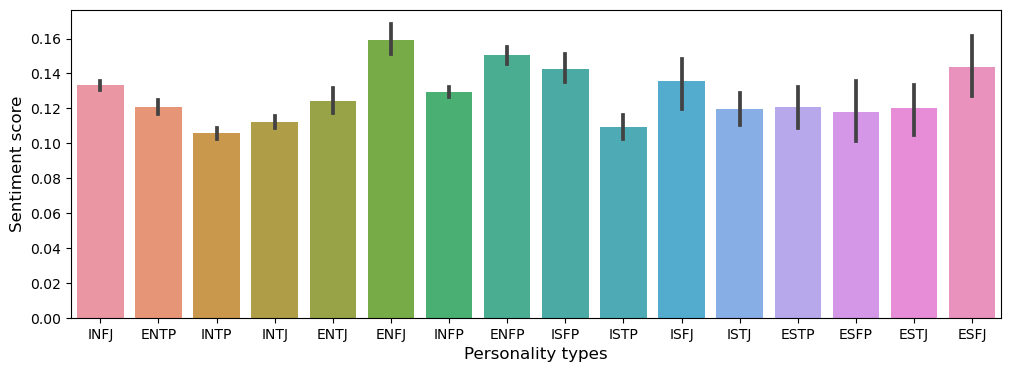

In [35]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.barplot(x='type', y='sentiment_score', data=data_set)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('Sentiment score', fontsize=12)
plt.show()


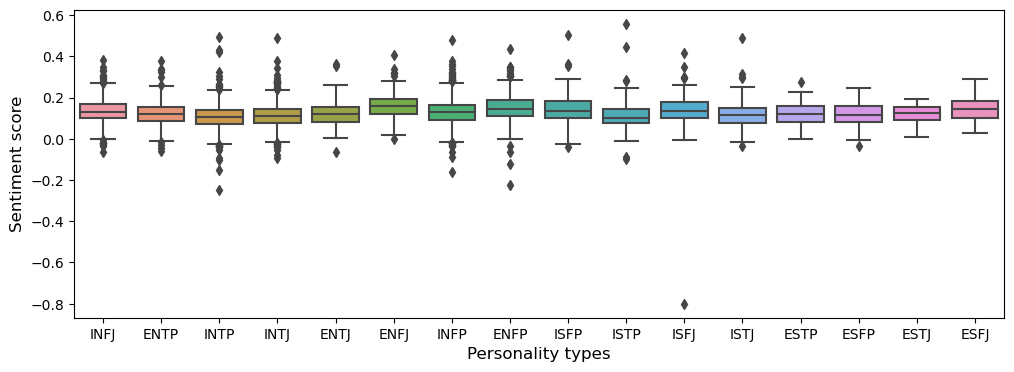

In [36]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.boxplot(x='type', y='sentiment_score', data=data_set)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('Sentiment score', fontsize=12)
plt.show()


### Word associations

In [38]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Create a bigram collocation finder
finder = BigramCollocationFinder.from_words(words)

# Use the raw frequency as the scoring function
finder.apply_freq_filter(3)

# Find the top 10 bigrams
bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 10)
print(bigrams)


[]


In [40]:
words

{'INFP': ['think',
  'agree',
  'personally',
  'consider',
  'alpha',
  'beta',
  'foxtrot',
  'lol',
  'joke',
  'people',
  'people',
  'agree',
  'emotions',
  'weak',
  'whiny',
  'suggest',
  'zen',
  'charlotte',
  'joko',
  'beck',
  'solid',
  'introduction',
  'mindfulness',
  'meditation',
  'means',
  'sit',
  'etc',
  'buddhism',
  'exactly',
  'zen',
  'emotional',
  'automatically',
  'make',
  'someone',
  'alpha',
  'every',
  'single',
  'human',
  'regardless',
  'type',
  'emotional',
  'feel',
  'things',
  'intensely',
  'emotions',
  'need',
  'kept',
  'buddhist',
  'daily',
  'thing',
  'actually',
  'thing',
  'brought',
  'clarity',
  'life',
  'lowered',
  'stress',
  'levels',
  'eliminated',
  'fits',
  'know',
  'one',
  'meditate',
  'know',
  'behind',
  'feel',
  'like',
  'women',
  'interacted',
  'quite',
  'best',
  'resolved',
  'issue',
  'appreciate',
  'everyone',
  'input',
  'started',
  'taking',
  'yoga',
  'classes',
  'lowered',
  'standa

In [41]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Create a bigram finder
bigram_finder = BigramAssocMeasures()

# Create a bigram collocation finder using the words dictionary
finder = BigramCollocationFinder.from_words(words)


In [44]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
for t in cnt_srs.index:
    finder = BigramCollocationFinder.from_words(words[t])
    finder.apply_word_filter(lambda w: len(w) < 3)
    finder.apply_freq_filter(2)
    print(t,finder.nbest(bigram_measures.raw_freq, 20))

INFP [('feel', 'like'), ('high', 'school'), ('pretty', 'much'), ('even', 'though'), ('would', 'say'), ('would', 'like'), ('sounds', 'like'), ('best', 'friend'), ('seems', 'like'), ('really', 'like'), ('years', 'ago'), ('long', 'time'), ('http', 'http'), ('people', 'think'), ('get', 'along'), ('many', 'people'), ('people', 'like'), ('things', 'like'), ('something', 'like'), ('someone', 'else')]
INFJ [('feel', 'like'), ('would', 'say'), ('sounds', 'like'), ('pretty', 'much'), ('would', 'like'), ('even', 'though'), ('high', 'school'), ('seems', 'like'), ('best', 'friend'), ('long', 'time'), ('really', 'like'), ('years', 'ago'), ('get', 'along'), ('someone', 'else'), ('personality', 'type'), ('something', 'like'), ('many', 'people'), ('people', 'think'), ('people', 'know'), ('cognitive', 'functions')]
INTP [('feel', 'like'), ('pretty', 'much'), ('high', 'school'), ('would', 'say'), ('would', 'like'), ('sounds', 'like'), ('seems', 'like'), ('even', 'though'), ('really', 'like'), ('get', 'al

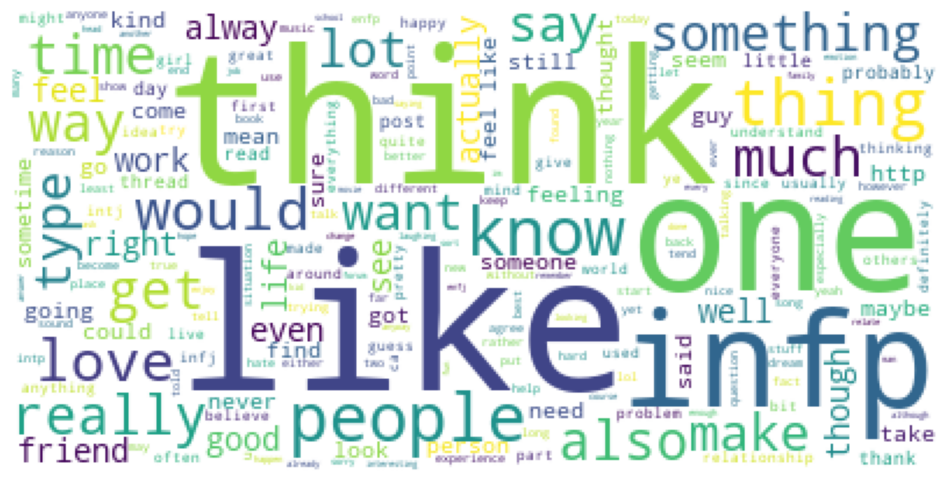

In [45]:
from wordcloud import WordCloud

# Define the personality type you want to create a word cloud for
personality_type = 'INFP'

# Create a string of all the words for that personality type
words_string = ' '.join(words[personality_type])

# Create a word cloud object
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(words_string)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()